In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True)
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

def train(model, trainloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        scheduler.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total:.2f}%")

train(model, trainloader, criterion, optimizer, num_epochs=10)

evaluate(model, testloader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 224MB/s]


Epoch [1/10], Loss: 1.0424
Epoch [2/10], Loss: 0.7130
Epoch [3/10], Loss: 0.6211
Epoch [4/10], Loss: 0.5634
Epoch [5/10], Loss: 0.5281
Epoch [6/10], Loss: 0.4893
Epoch [7/10], Loss: 0.4631
Epoch [8/10], Loss: 0.4505
Epoch [9/10], Loss: 0.4295
Epoch [10/10], Loss: 0.4136
Accuracy: 80.62%



Testing with 1 patches:
Training adversarial patches...
Epoch 1/20, Loss: 5.3522
Epoch 2/20, Loss: 4.8713
Epoch 3/20, Loss: 4.6960
Epoch 4/20, Loss: 4.6531
Epoch 5/20, Loss: 4.6015
Epoch 6/20, Loss: 4.5669
Epoch 7/20, Loss: 4.5925
Epoch 8/20, Loss: 4.5610
Epoch 9/20, Loss: 4.5629
Epoch 10/20, Loss: 4.5096
Epoch 11/20, Loss: 4.5261
Epoch 12/20, Loss: 4.5282
Epoch 13/20, Loss: 4.5131
Epoch 14/20, Loss: 4.5431
Epoch 15/20, Loss: 4.5074
Epoch 16/20, Loss: 4.5217
Epoch 17/20, Loss: 4.5107
Epoch 18/20, Loss: 4.5112
Epoch 19/20, Loss: 4.5279
Epoch 20/20, Loss: 4.5199
Saving 1 patches...
Saved patch 1 to adversarial_patch_3x3_set1_patch1.pth
Visualizing 1 patches...


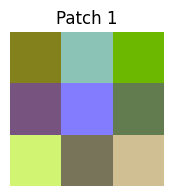

Evaluating 1 patches...
Attack Success Rate: 64.54%

Testing with 2 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.9749
Epoch 2/20, Loss: 4.5027
Epoch 3/20, Loss: 4.3707
Epoch 4/20, Loss: 4.2747
Epoch 5/20, Loss: 4.2296
Epoch 6/20, Loss: 4.1758
Epoch 7/20, Loss: 4.1643
Epoch 8/20, Loss: 4.1500
Epoch 9/20, Loss: 4.1354
Epoch 10/20, Loss: 4.1310
Epoch 11/20, Loss: 4.1343
Epoch 12/20, Loss: 4.1252
Epoch 13/20, Loss: 4.1388
Epoch 14/20, Loss: 4.1295
Epoch 15/20, Loss: 4.1232
Epoch 16/20, Loss: 4.1165
Epoch 17/20, Loss: 4.1138
Epoch 18/20, Loss: 4.1173
Epoch 19/20, Loss: 4.0982
Epoch 20/20, Loss: 4.1186
Saving 2 patches...
Saved patch 1 to adversarial_patch_3x3_set2_patch1.pth
Saved patch 2 to adversarial_patch_3x3_set2_patch2.pth
Visualizing 2 patches...


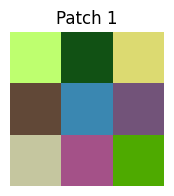

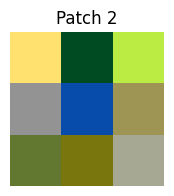

Evaluating 2 patches...
Attack Success Rate: 69.10%

Testing with 3 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.6806
Epoch 2/20, Loss: 4.1486
Epoch 3/20, Loss: 4.0785
Epoch 4/20, Loss: 4.0349
Epoch 5/20, Loss: 4.0331
Epoch 6/20, Loss: 3.9974
Epoch 7/20, Loss: 3.9927
Epoch 8/20, Loss: 3.9744
Epoch 9/20, Loss: 3.9506
Epoch 10/20, Loss: 3.9692
Epoch 11/20, Loss: 3.9426
Epoch 12/20, Loss: 3.9494
Epoch 13/20, Loss: 3.9500
Epoch 14/20, Loss: 3.9457
Epoch 15/20, Loss: 3.9425
Epoch 16/20, Loss: 3.9309
Epoch 17/20, Loss: 3.9339
Epoch 18/20, Loss: 3.9248
Epoch 19/20, Loss: 3.9194
Epoch 20/20, Loss: 3.9420
Saving 3 patches...
Saved patch 1 to adversarial_patch_3x3_set3_patch1.pth
Saved patch 2 to adversarial_patch_3x3_set3_patch2.pth
Saved patch 3 to adversarial_patch_3x3_set3_patch3.pth
Visualizing 3 patches...


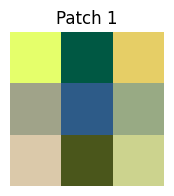

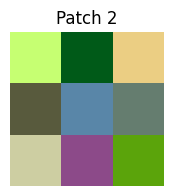

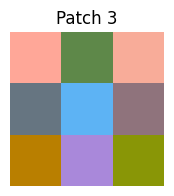

Evaluating 3 patches...
Attack Success Rate: 71.83%

Testing with 4 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.4652
Epoch 2/20, Loss: 3.9907
Epoch 3/20, Loss: 3.9089
Epoch 4/20, Loss: 3.8787
Epoch 5/20, Loss: 3.8607
Epoch 6/20, Loss: 3.8438
Epoch 7/20, Loss: 3.8263
Epoch 8/20, Loss: 3.8090
Epoch 9/20, Loss: 3.8153
Epoch 10/20, Loss: 3.8085
Epoch 11/20, Loss: 3.8144
Epoch 12/20, Loss: 3.7986
Epoch 13/20, Loss: 3.8039
Epoch 14/20, Loss: 3.8001
Epoch 15/20, Loss: 3.8005
Epoch 16/20, Loss: 3.8042
Epoch 17/20, Loss: 3.8048
Epoch 18/20, Loss: 3.8091
Epoch 19/20, Loss: 3.7969
Epoch 20/20, Loss: 3.8143
Saving 4 patches...
Saved patch 1 to adversarial_patch_3x3_set4_patch1.pth
Saved patch 2 to adversarial_patch_3x3_set4_patch2.pth
Saved patch 3 to adversarial_patch_3x3_set4_patch3.pth
Saved patch 4 to adversarial_patch_3x3_set4_patch4.pth
Visualizing 4 patches...


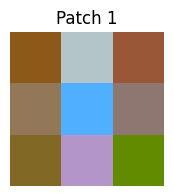

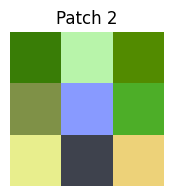

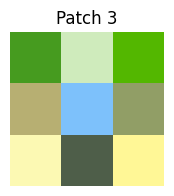

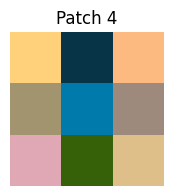

Evaluating 4 patches...
Attack Success Rate: 71.79%

Testing with 5 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.3260
Epoch 2/20, Loss: 3.9430
Epoch 3/20, Loss: 3.8934
Epoch 4/20, Loss: 3.8517
Epoch 5/20, Loss: 3.8221
Epoch 6/20, Loss: 3.7799
Epoch 7/20, Loss: 3.7501
Epoch 8/20, Loss: 3.7541
Epoch 9/20, Loss: 3.7454
Epoch 10/20, Loss: 3.7356
Epoch 11/20, Loss: 3.7251
Epoch 12/20, Loss: 3.7392
Epoch 13/20, Loss: 3.7233
Epoch 14/20, Loss: 3.7232
Epoch 15/20, Loss: 3.7100
Epoch 16/20, Loss: 3.6982
Epoch 17/20, Loss: 3.7197
Epoch 18/20, Loss: 3.7062
Epoch 19/20, Loss: 3.7022
Epoch 20/20, Loss: 3.6924
Saving 5 patches...
Saved patch 1 to adversarial_patch_3x3_set5_patch1.pth
Saved patch 2 to adversarial_patch_3x3_set5_patch2.pth
Saved patch 3 to adversarial_patch_3x3_set5_patch3.pth
Saved patch 4 to adversarial_patch_3x3_set5_patch4.pth
Saved patch 5 to adversarial_patch_3x3_set5_patch5.pth
Visualizing 5 patches...


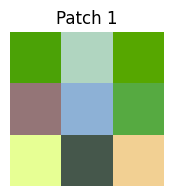

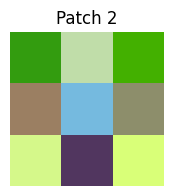

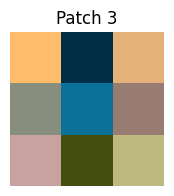

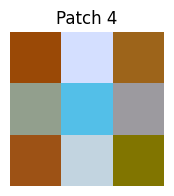

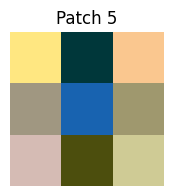

Evaluating 5 patches...
Attack Success Rate: 72.73%


In [ ]:
def create_multiple_patches(num_patches, patch_size=(3, 3)):
    patches = [torch.randn(3, *patch_size, requires_grad=True, device=device) for _ in range(num_patches)]
    return patches

def place_multiple_patches(img, patches):
    batch_size, _, h, w = img.size()
    patched_imgs = img.clone()
    for patch in patches:
        ph, pw = patch.size(1), patch.size(2)
        for i in range(batch_size):
            x_offset = torch.randint(0, h - ph + 1, (1,)).item()
            y_offset = torch.randint(0, w - pw + 1, (1,)).item()
            patched_imgs[i, :, x_offset:x_offset+ph, y_offset:y_offset+pw] = patch
    return patched_imgs

def train_adversarial_patches(model, patches, target_class=None, num_epochs=20):
    patch_optimizer = optim.Adam(patches, lr=0.01)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        total_loss = 0
        for images, _ in trainloader:
            images = images.to(device)
            patch_optimizer.zero_grad()
            patched_images = place_multiple_patches(images, patches)
            outputs = model(patched_images)
            if target_class is not None:
                labels = torch.full((images.size(0),), target_class, dtype=torch.long, device=device)
            else:
                labels = torch.randint(0, 10, (images.size(0),), device=device)
            loss = criterion(outputs, labels)
            loss.backward()
            patch_optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(trainloader):.4f}")

def evaluate_multiple_patches(model, patches, dataloader, target_class=None):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            patched_images = place_multiple_patches(images, patches)
            outputs = model(patched_images)
            _, predicted = outputs.max(1)
            if target_class is not None:
                correct += (predicted == target_class).sum().item()
            else:
                correct += (predicted != labels).sum().item()
            total += labels.size(0)
    print(f"Attack Success Rate: {100 * correct / total:.2f}%")

def visualize_multiple_patches(patches):
    for i, patch in enumerate(patches):
        patch = patch.detach().cpu().numpy()
        patch = np.clip((patch - patch.min()) / (patch.max() - patch.min()), 0, 1)
        plt.figure(figsize=(2, 2))
        plt.imshow(np.transpose(patch, (1, 2, 0)))
        plt.title(f"Patch {i+1}")
        plt.axis('off')
        plt.show()

def save_patches(patches, patch_size, num_patches):
    for i, patch in enumerate(patches):
        file_name = f"adversarial_patch_{patch_size[0]}x{patch_size[1]}_set{num_patches}_patch{i+1}.pth"
        torch.save(patch, file_name)
        print(f"Saved patch {i+1} to {file_name}")

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

patch_size = (3, 3)

for num_patches in range(1, 6):
    print(f"\nTesting with {num_patches} patches:")

    patches = create_multiple_patches(num_patches, patch_size)

    print("Training adversarial patches...")
    train_adversarial_patches(model, patches, target_class=None, num_epochs=20)

    print(f"Saving {num_patches} patches...")
    save_patches(patches, patch_size, num_patches)

    print(f"Visualizing {num_patches} patches...")
    visualize_multiple_patches(patches)

    print(f"Evaluating {num_patches} patches...")
    evaluate_multiple_patches(model, patches, testloader)


Visualizing attack success examples for 2 patches:


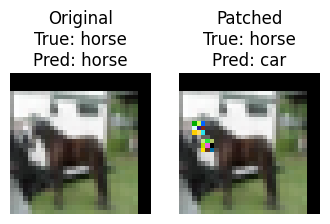

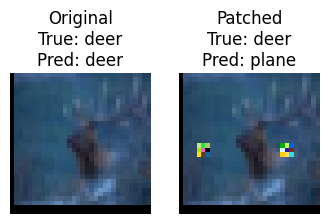

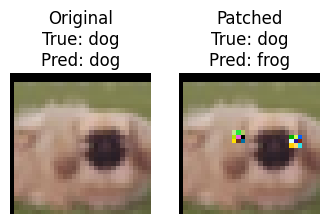

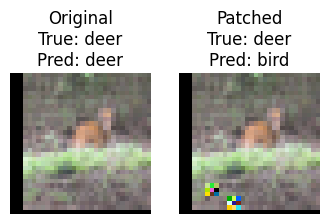

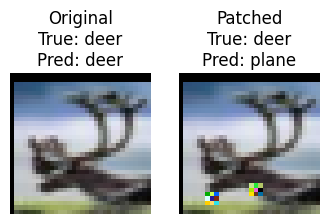


Visualizing attack success examples for 3 patches:


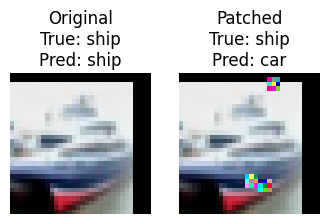

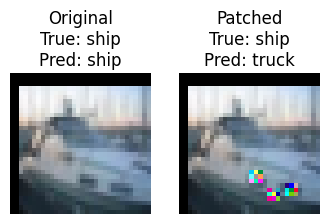

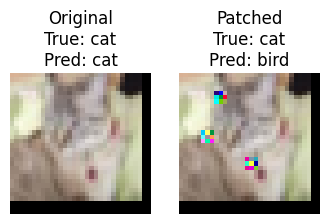

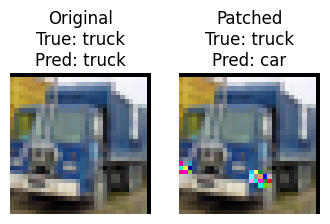

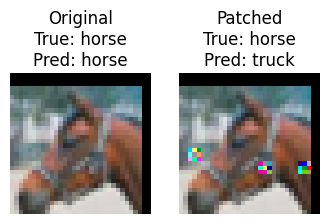


Visualizing attack success examples for 4 patches:


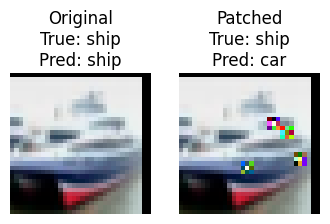

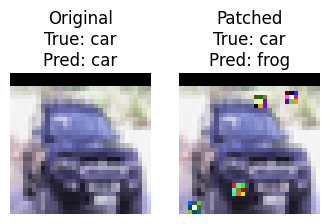

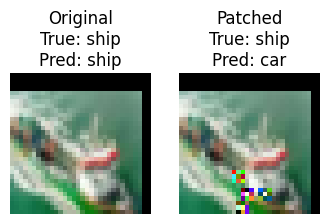

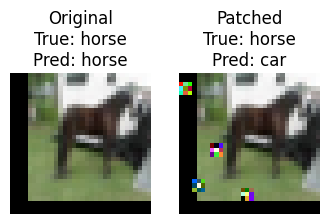

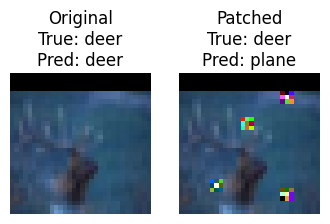


Visualizing attack success examples for 5 patches:


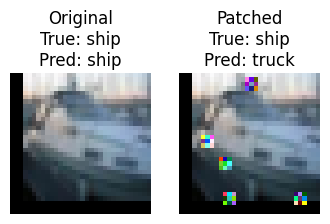

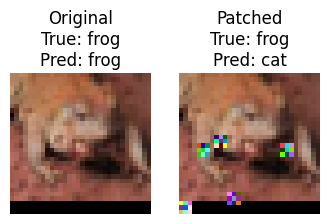

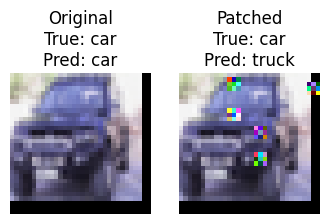

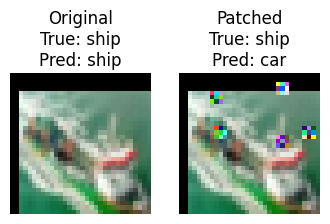

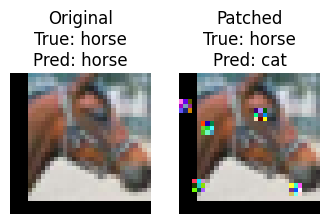

In [ ]:
def visualize_attack_success_examples(model, patches, dataloader, classes, num_success=5):
    model.eval()
    success_shown = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        patched_images = place_multiple_patches(images.clone(), patches)
        with torch.no_grad():
            original_preds = model(images).argmax(dim=1)
            patched_preds = model(patched_images).argmax(dim=1)

        for i in range(images.size(0)):
            if success_shown < num_success and original_preds[i] == labels[i] and patched_preds[i] != labels[i]:
                visualize_comparison_cifar_size(images[i], patched_images[i], labels[i], original_preds[i], patched_preds[i], classes)
                success_shown += 1

            if success_shown >= num_success:
                return

def visualize_comparison_cifar_size(original_image, patched_image, true_label, original_pred, patched_pred, classes):
    original_image = (original_image.cpu().detach().numpy().transpose(1, 2, 0) * 0.5) + 0.5
    patched_image = (patched_image.cpu().detach().numpy().transpose(1, 2, 0) * 0.5) + 0.5

    fig, axes = plt.subplots(1, 2, figsize=(4, 4))
    axes[0].imshow(np.clip(original_image, 0, 1))
    axes[0].set_title(f"Original\nTrue: {classes[true_label.item()]}\nPred: {classes[original_pred.item()]}")
    axes[0].axis('off')

    axes[1].imshow(np.clip(patched_image, 0, 1))
    axes[1].set_title(f"Patched\nTrue: {classes[true_label.item()]}\nPred: {classes[patched_pred.item()]}")
    axes[1].axis('off')

    plt.show()

for num_patches in range(2, 6):
    print(f"\nVisualizing attack success examples for {num_patches} patches:")

    patches = create_multiple_patches(num_patches, patch_size)

    visualize_attack_success_examples(model, patches, testloader, classes, num_success=5)


Testing with 1 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.6829
Epoch 2/20, Loss: 4.1530
Epoch 3/20, Loss: 4.0581
Epoch 4/20, Loss: 4.0324
Epoch 5/20, Loss: 3.9921
Epoch 6/20, Loss: 3.9716
Epoch 7/20, Loss: 3.9573
Epoch 8/20, Loss: 3.9407
Epoch 9/20, Loss: 3.9640
Epoch 10/20, Loss: 3.9435
Epoch 11/20, Loss: 3.9380
Epoch 12/20, Loss: 3.9241
Epoch 13/20, Loss: 3.9115
Epoch 14/20, Loss: 3.9196
Epoch 15/20, Loss: 3.9094
Epoch 16/20, Loss: 3.9192
Epoch 17/20, Loss: 3.9225
Epoch 18/20, Loss: 3.9040
Epoch 19/20, Loss: 3.9198
Epoch 20/20, Loss: 3.9173
Saving 1 patches...
Saved patch 1 to adversarial_patch_5x5_set1_patch1.pth
Visualizing 1 patches...


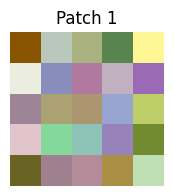

Evaluating 1 patches...
Attack Success Rate: 72.18%

Testing with 2 patches:
Training adversarial patches...
Epoch 1/20, Loss: 4.2337
Epoch 2/20, Loss: 3.8357
Epoch 3/20, Loss: 3.7596
Epoch 4/20, Loss: 3.7127
Epoch 5/20, Loss: 3.7048
Epoch 6/20, Loss: 3.6793
Epoch 7/20, Loss: 3.6620
Epoch 8/20, Loss: 3.6603
Epoch 9/20, Loss: 3.6413
Epoch 10/20, Loss: 3.6385
Epoch 11/20, Loss: 3.6291
Epoch 12/20, Loss: 3.6183
Epoch 13/20, Loss: 3.6180
Epoch 14/20, Loss: 3.6284
Epoch 15/20, Loss: 3.6310
Epoch 16/20, Loss: 3.6209
Epoch 17/20, Loss: 3.6232
Epoch 18/20, Loss: 3.6066
Epoch 19/20, Loss: 3.6092
Epoch 20/20, Loss: 3.6110
Saving 2 patches...
Saved patch 1 to adversarial_patch_5x5_set2_patch1.pth
Saved patch 2 to adversarial_patch_5x5_set2_patch2.pth
Visualizing 2 patches...


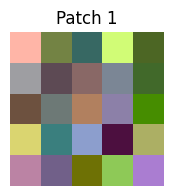

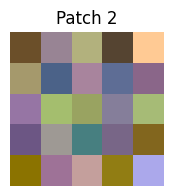

Evaluating 2 patches...
Attack Success Rate: 76.87%

Testing with 3 patches:
Training adversarial patches...
Epoch 1/20, Loss: 3.9162
Epoch 2/20, Loss: 3.6077
Epoch 3/20, Loss: 3.5418
Epoch 4/20, Loss: 3.5121
Epoch 5/20, Loss: 3.4819
Epoch 6/20, Loss: 3.4711
Epoch 7/20, Loss: 3.4687
Epoch 8/20, Loss: 3.4544
Epoch 9/20, Loss: 3.4605
Epoch 10/20, Loss: 3.4603
Epoch 11/20, Loss: 3.4416
Epoch 12/20, Loss: 3.4427
Epoch 13/20, Loss: 3.4334
Epoch 14/20, Loss: 3.4158
Epoch 15/20, Loss: 3.4319
Epoch 16/20, Loss: 3.4357
Epoch 17/20, Loss: 3.4408
Epoch 18/20, Loss: 3.4446
Epoch 19/20, Loss: 3.4243
Epoch 20/20, Loss: 3.4412
Saving 3 patches...
Saved patch 1 to adversarial_patch_5x5_set3_patch1.pth
Saved patch 2 to adversarial_patch_5x5_set3_patch2.pth
Saved patch 3 to adversarial_patch_5x5_set3_patch3.pth
Visualizing 3 patches...


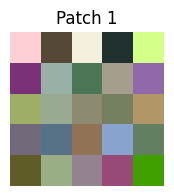

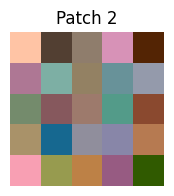

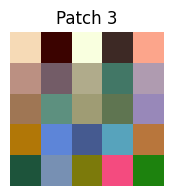

Evaluating 3 patches...
Attack Success Rate: 77.46%

Testing with 4 patches:
Training adversarial patches...
Epoch 1/20, Loss: 3.7212
Epoch 2/20, Loss: 3.4960
Epoch 3/20, Loss: 3.4641
Epoch 4/20, Loss: 3.4294
Epoch 5/20, Loss: 3.4220
Epoch 6/20, Loss: 3.4046
Epoch 7/20, Loss: 3.4125
Epoch 8/20, Loss: 3.4215
Epoch 9/20, Loss: 3.3881
Epoch 10/20, Loss: 3.4056
Epoch 11/20, Loss: 3.3862
Epoch 12/20, Loss: 3.3931
Epoch 13/20, Loss: 3.3964
Epoch 14/20, Loss: 3.3919
Epoch 15/20, Loss: 3.3951
Epoch 16/20, Loss: 3.3852
Epoch 17/20, Loss: 3.3827
Epoch 18/20, Loss: 3.3947
Epoch 19/20, Loss: 3.3839
Epoch 20/20, Loss: 3.3807
Saving 4 patches...
Saved patch 1 to adversarial_patch_5x5_set4_patch1.pth
Saved patch 2 to adversarial_patch_5x5_set4_patch2.pth
Saved patch 3 to adversarial_patch_5x5_set4_patch3.pth
Saved patch 4 to adversarial_patch_5x5_set4_patch4.pth
Visualizing 4 patches...


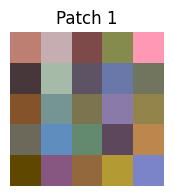

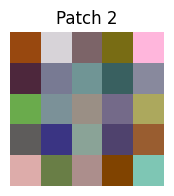

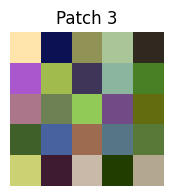

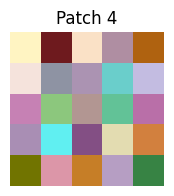

Evaluating 4 patches...
Attack Success Rate: 78.96%

Testing with 5 patches:
Training adversarial patches...
Epoch 1/20, Loss: 3.6944
Epoch 2/20, Loss: 3.4605
Epoch 3/20, Loss: 3.4240
Epoch 4/20, Loss: 3.3973
Epoch 5/20, Loss: 3.3823
Epoch 6/20, Loss: 3.3621
Epoch 7/20, Loss: 3.3242
Epoch 8/20, Loss: 3.3368
Epoch 9/20, Loss: 3.3290
Epoch 10/20, Loss: 3.3102
Epoch 11/20, Loss: 3.3161
Epoch 12/20, Loss: 3.3155
Epoch 13/20, Loss: 3.3193
Epoch 14/20, Loss: 3.2958
Epoch 15/20, Loss: 3.3045
Epoch 16/20, Loss: 3.3022
Epoch 17/20, Loss: 3.3004
Epoch 18/20, Loss: 3.2999
Epoch 19/20, Loss: 3.2999
Epoch 20/20, Loss: 3.2919
Saving 5 patches...
Saved patch 1 to adversarial_patch_5x5_set5_patch1.pth
Saved patch 2 to adversarial_patch_5x5_set5_patch2.pth
Saved patch 3 to adversarial_patch_5x5_set5_patch3.pth
Saved patch 4 to adversarial_patch_5x5_set5_patch4.pth
Saved patch 5 to adversarial_patch_5x5_set5_patch5.pth
Visualizing 5 patches...


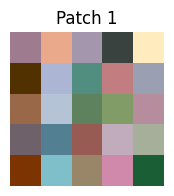

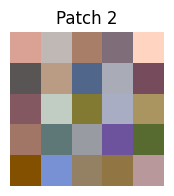

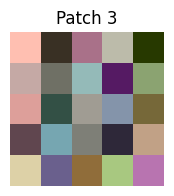

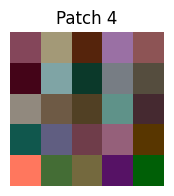

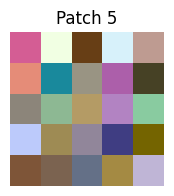

Evaluating 5 patches...
Attack Success Rate: 78.17%


In [ ]:
def create_multiple_patches(num_patches, patch_size=(5, 5)):
    patches = [torch.randn(3, *patch_size, requires_grad=True, device=device) for _ in range(num_patches)]
    return patches

def place_multiple_patches(img, patches):
    batch_size, _, h, w = img.size()
    patched_imgs = img.clone()
    for patch in patches:
        ph, pw = patch.size(1), patch.size(2)
        for i in range(batch_size):
            x_offset = torch.randint(0, h - ph + 1, (1,)).item()
            y_offset = torch.randint(0, w - pw + 1, (1,)).item()
            patched_imgs[i, :, x_offset:x_offset+ph, y_offset:y_offset+pw] = patch
    return patched_imgs

def train_adversarial_patches(model, patches, target_class=None, num_epochs=20):
    patch_optimizer = optim.Adam(patches, lr=0.01)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        total_loss = 0
        for images, _ in trainloader:
            images = images.to(device)
            patch_optimizer.zero_grad()
            patched_images = place_multiple_patches(images, patches)
            outputs = model(patched_images)
            if target_class is not None:
                labels = torch.full((images.size(0),), target_class, dtype=torch.long, device=device)
            else:
                labels = torch.randint(0, 10, (images.size(0),), device=device)
            loss = criterion(outputs, labels)
            loss.backward()
            patch_optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(trainloader):.4f}")

def evaluate_multiple_patches(model, patches, dataloader, target_class=None):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            patched_images = place_multiple_patches(images, patches)
            outputs = model(patched_images)
            _, predicted = outputs.max(1)
            if target_class is not None:
                correct += (predicted == target_class).sum().item()
            else:
                correct += (predicted != labels).sum().item()
            total += labels.size(0)
    print(f"Attack Success Rate: {100 * correct / total:.2f}%")

def visualize_multiple_patches(patches):
    for i, patch in enumerate(patches):
        patch = patch.detach().cpu().numpy()
        patch = np.clip((patch - patch.min()) / (patch.max() - patch.min()), 0, 1)
        plt.figure(figsize=(2, 2))
        plt.imshow(np.transpose(patch, (1, 2, 0)))
        plt.title(f"Patch {i+1}")
        plt.axis('off')
        plt.show()

def save_patches(patches, patch_size, num_patches):
    for i, patch in enumerate(patches):
        file_name = f"adversarial_patch_{patch_size[0]}x{patch_size[1]}_set{num_patches}_patch{i+1}.pth"
        torch.save(patch, file_name)
        print(f"Saved patch {i+1} to {file_name}")

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

patch_size = (5, 5)

for num_patches in range(1, 6):
    print(f"\nTesting with {num_patches} patches:")

    patches = create_multiple_patches(num_patches, patch_size)

    print("Training adversarial patches...")
    train_adversarial_patches(model, patches, target_class=None, num_epochs=20)

    print(f"Saving {num_patches} patches...")
    save_patches(patches, patch_size, num_patches)

    print(f"Visualizing {num_patches} patches...")
    visualize_multiple_patches(patches)

    print(f"Evaluating {num_patches} patches...")
    evaluate_multiple_patches(model, patches, testloader)


Visualizing attack success examples for 2 patches:


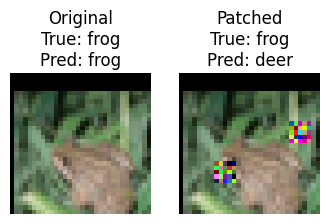

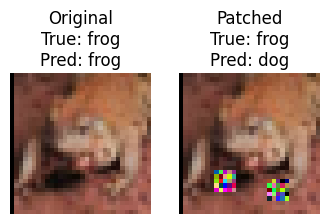

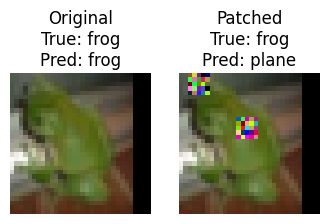

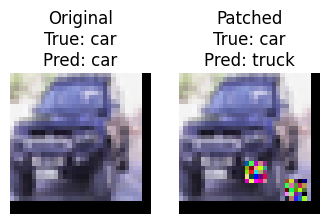

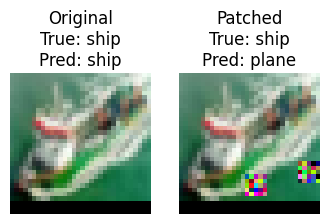


Visualizing attack success examples for 3 patches:


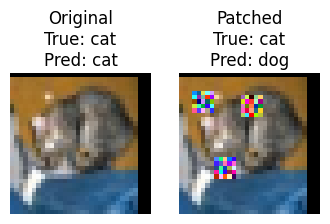

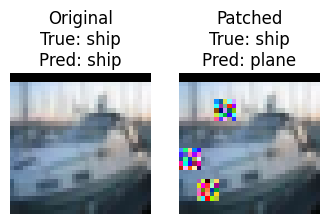

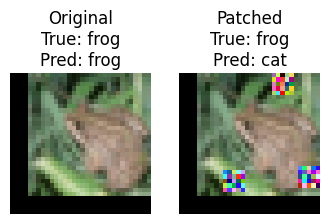

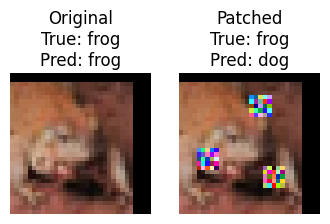

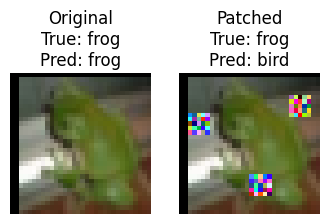


Visualizing attack success examples for 4 patches:


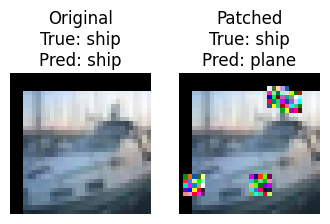

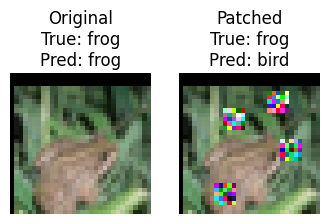

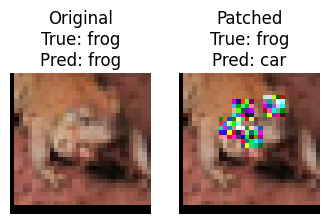

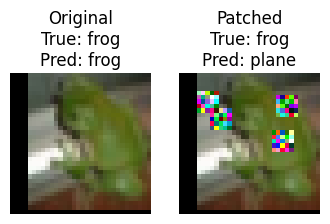

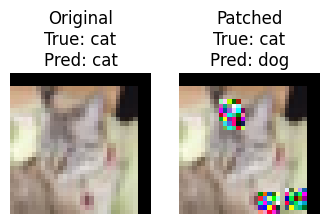


Visualizing attack success examples for 5 patches:


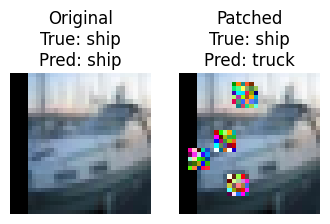

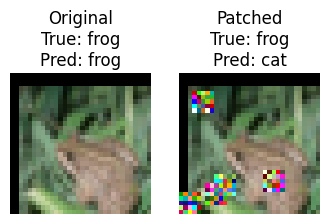

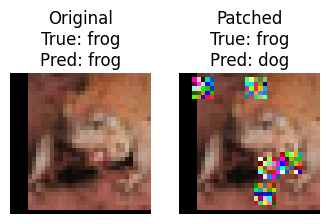

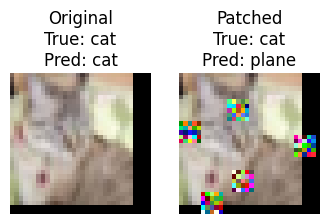

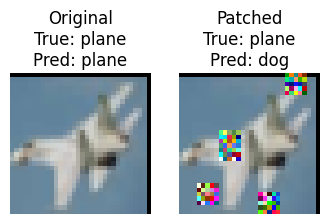

In [ ]:
def visualize_attack_success_examples(model, patches, dataloader, classes, num_success=5):
    model.eval()
    success_shown = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        patched_images = place_multiple_patches(images.clone(), patches)
        with torch.no_grad():
            original_preds = model(images).argmax(dim=1)
            patched_preds = model(patched_images).argmax(dim=1)

        for i in range(images.size(0)):
            # 성공 사례: 원본 예측은 맞았으나 패치로 인해 오답
            if success_shown < num_success and original_preds[i] == labels[i] and patched_preds[i] != labels[i]:
                visualize_comparison_cifar_size(images[i], patched_images[i], labels[i], original_preds[i], patched_preds[i], classes)
                success_shown += 1

            if success_shown >= num_success:
                return

def visualize_comparison_cifar_size(original_image, patched_image, true_label, original_pred, patched_pred, classes):
    original_image = (original_image.cpu().detach().numpy().transpose(1, 2, 0) * 0.5) + 0.5
    patched_image = (patched_image.cpu().detach().numpy().transpose(1, 2, 0) * 0.5) + 0.5

    fig, axes = plt.subplots(1, 2, figsize=(4, 4))
    axes[0].imshow(np.clip(original_image, 0, 1))
    axes[0].set_title(f"Original\nTrue: {classes[true_label.item()]}\nPred: {classes[original_pred.item()]}")
    axes[0].axis('off')

    axes[1].imshow(np.clip(patched_image, 0, 1))
    axes[1].set_title(f"Patched\nTrue: {classes[true_label.item()]}\nPred: {classes[patched_pred.item()]}")
    axes[1].axis('off')

    plt.show()

for num_patches in range(2, 6):
    print(f"\nVisualizing attack success examples for {num_patches} patches:")

    patches = create_multiple_patches(num_patches, patch_size)

    visualize_attack_success_examples(model, patches, testloader, classes, num_success=5)